## Packages

In [1]:
import os
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

## Global Parameters

In [2]:
ROOT_DIRECTORY = "/home/kaan.aytekin/Thesis"
# Non-feature columns
non_feature_columns = [
    "simulation_run",
    "connected_vehicle_ratio",
    "is_accident_simulation",
    "accident_location",
    "accident_start_time",
    "accident_duration",
    "accident_lane",
    "prev_detector_detector_number",
    "next_detector_detector_number",
    "detector_number",
    "timestamp",
]

## Pickle Loading

In [3]:
with open(os.path.join(ROOT_DIRECTORY, "model/min_max_scaler.pkl"), "rb") as file:
    min_max_scaler = pickle.load(file)

In [4]:
with open(os.path.join(ROOT_DIRECTORY, "model/random_forest_regressor.pkl"), "rb") as file:
    rf_regressor = pickle.load(file)

## Data Loading

In [5]:
processed_feature_columns_path = os.path.join(
    ROOT_DIRECTORY, "data/thesis_data/processed_feature_columns.txt"
)
with open(processed_feature_columns_path, "r") as reader:
    FEATURE_COLUMNS = reader.read().split("\n")


df_train = pd.read_csv(
    os.path.join(ROOT_DIRECTORY, "data/thesis_data/x_train_processed.csv")
)[FEATURE_COLUMNS + ["target"]]
df_test = pd.read_csv(
    os.path.join(ROOT_DIRECTORY, "data/thesis_data/x_test_processed.csv")
)[FEATURE_COLUMNS + ["target"]]

In [6]:
x_train = df_train[FEATURE_COLUMNS]
y_train = df_train["target"]

x_test = df_test[FEATURE_COLUMNS]
y_test = df_test["target"]



In [7]:
x_train_scaled = min_max_scaler.transform(x_train)

## Model Inspection

In [8]:
result = permutation_importance(
    rf_regressor,
    x_train_scaled,
    y_train, 
    scoring="neg_mean_squared_error",
    n_repeats=10, 
    random_state=42, 
    n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=FEATURE_COLUMNS)

In [16]:
dict(forest_importances.sort_values(ascending=False))

{'section_travel_time_sec': 381.8511376472842,
 'delay_time_sec': 264.9554119923544,
 'avg_speed_kmph': 133.29294995754128,
 'next_detector_delay_time_sec_lag5': 42.009713416478164,
 'next_detector_avg_speed_kmph_lag5': 40.32926017033226,
 'avg_speed_kmph_lag1': 31.8382392113796,
 'next_detector_section_travel_time_sec_lag5': 31.70557337372034,
 'delay_time_sec_lag1': 30.622858718011365,
 'next_detector_flow_vehph_lag4': 30.04891059986405,
 'section_travel_time_sec_lag1': 27.85875548991992,
 'density_vehpkm_lag1': 21.94483141576668,
 'density_vehpkm': 21.37737646507477,
 'next_detector_density_vehpkm_lag5': 20.288431626859044,
 'next_detector_avg_speed_kmph_lag6': 19.537679964012867,
 'next_detector_section_travel_time_sec_lag6': 18.914625710295006,
 'next_detector_density_vehpkm_lag8': 16.785313970155876,
 'next_detector_density_vehpkm_lag6': 16.400713542862114,
 'next_detector_delay_time_sec_lag6': 16.164413315923063,
 'next_detector_flow_vehph_lag8': 15.349070811760253,
 'next_detec

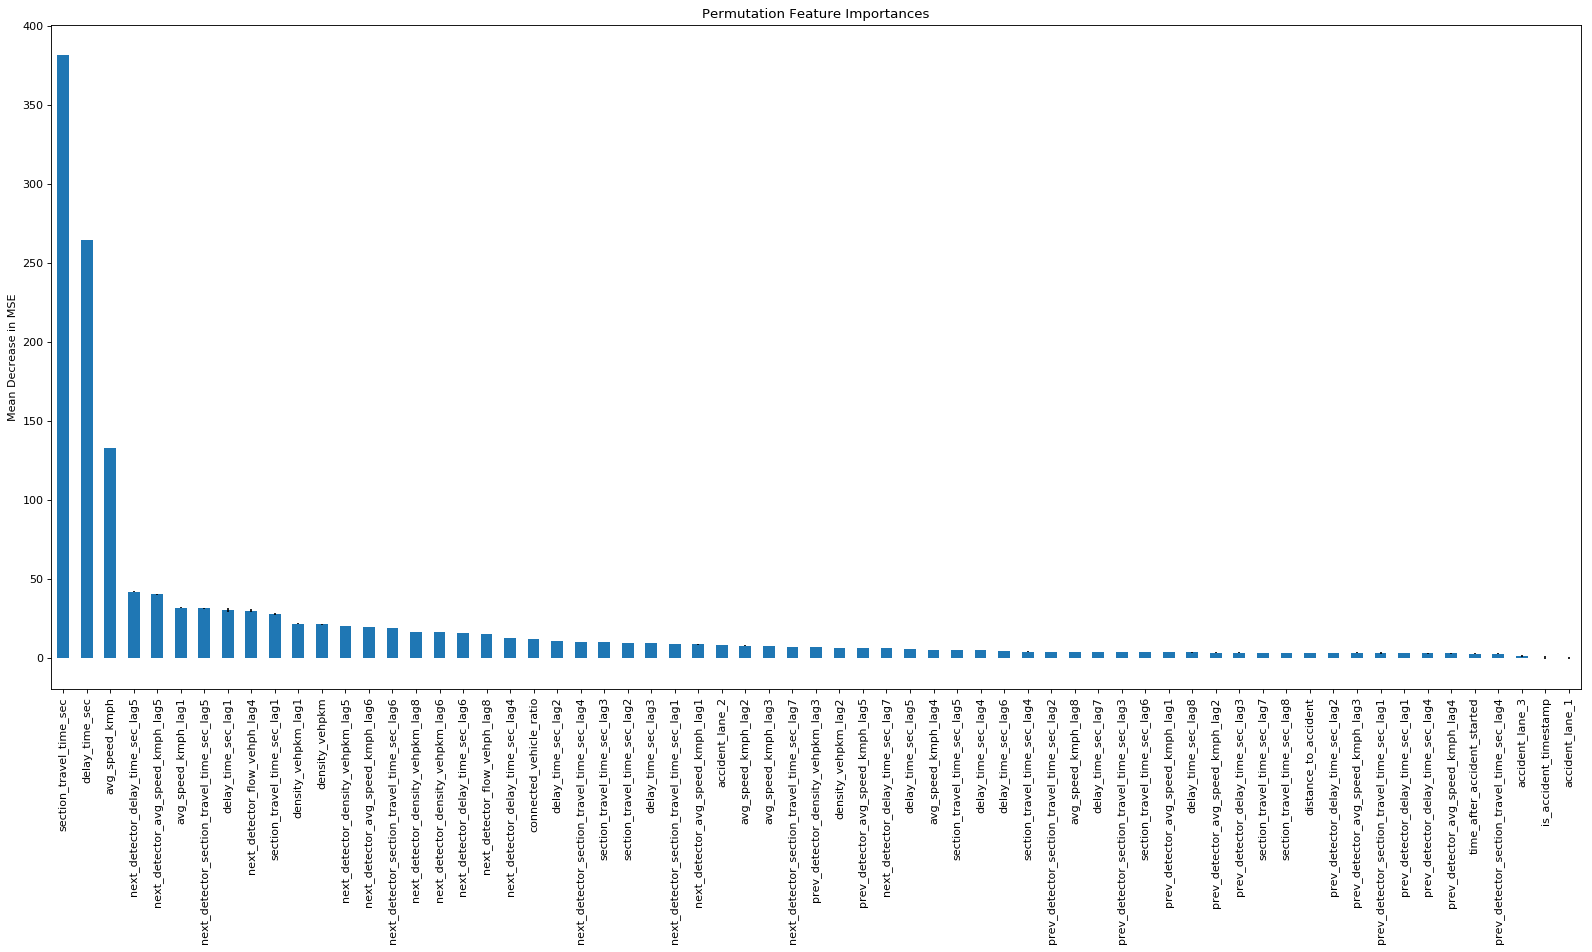

In [9]:
fig, ax = plt.subplots(figsize=(20, 12), dpi=80)
#plt.figure(figsize=(20, 12), dpi=80)
forest_importances.sort_values(ascending=False).plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Permutation Feature Importances")
ax.set_ylabel("Mean Decrease in MSE")
fig.tight_layout()

## Performance 

### Train

In [10]:
y_train_pred = rf_regressor.predict(x_train_scaled)
mean_squared_error(y_train,y_train_pred)

224.8947213963733

### Test

In [11]:
x_test_scaled = min_max_scaler.transform(x_test)
y_test_pred = rf_regressor.predict(x_test_scaled)
mean_squared_error(y_test,y_test_pred)

247.77340052603046